<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/waves/CoherentDefocus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defocus in Coherent Imaging Systems
## David Brady
## University of Arizona
## July 2023

This note book analyzes 3D scenes captured with with defocus in coherent imaging.


## libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from skimage import io
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
from google.colab import files
from scipy.special import jn, jn_zeros


## Defocus Impulse response and transfer function

In a defocus plane, the the inpulse response of coherent focal imaging system may be modeled as
\begin{equation}
   h(x'',y'',x_r,y_r)=|M|
e^{i\pi {{{x_r}^2+{y_r}^2}\over
    {\lambda |M| d_i}}}h_r(x''-x_r,y''-y_r)
 \end{equation}
where
\begin{equation}
 h_r(x,y)= {1\over \lambda^2 d_i^2}\int\int e^{i\pi \frac{\theta_z}{\lambda} (x'^2+y'^2)}
P(x',y')e^{-i{2\pi\over \lambda d_i} \left (x'x +y'y\right
  )}dx'dy'
\end{equation}
and $\theta_z=\frac{1}{z_1}+\frac{1}{z_2}-\frac{1}{F}$.

To simpliify the following analysis, we assume that $M$ is sufficiently large that the quadratic phase term may be neglected.

We represent $x'$ and $y'$ the Fourier space of the image as $x'=u\lambda F$ such that
 \begin{equation}
 h_r(x,y)= {1\over \lambda^2 d_i^2}\int\int e^{i\pi \theta_z \lambda F^2(u^2+v^2)}
P(u\lambda F, v\lambda F)e^{-i2\pi \left (ux +vy\right
  )}dudv
\end{equation}
Since $P(u\lambda F, v\lambda F)$ is a disk of radius $\frac{1}{\lambda f/\#}$ as a function of $u$, we represent $u$ and $v$ in units of $\frac{1}{\lambda f/\#}$
 With these units in mind, the defocus phase can be expressed
$$\pi \frac{A^2\theta_z}{\lambda }  \lbrack (\lambda f/\#)^2(u^2+v^2)\rbrack = \frac{2\pi}{\lambda} w_{20}  \lbrack (\lambda f/\#)^2(u^2+v^2)\rbrack$$
where $w_{20}=\frac{A^2\theta_z}{2}$ is the defocus aberration.

In simulations below $w_{20}$ is in units of $\lambda$.

The shift in the image or object plane as a function of $w_{20}$ is
$$\Delta z_o=\frac{2w_{20} z_o^2}{A^2}$$
 in object space (depth of field) or
 $$\Delta z_i=\frac{2w_{20} z_i^2}{A^2}$$
 in image space (depth of focus). In terms of magnification M, $\Delta z_i=M^2\Delta z_o$. Note  $\frac{z_i}{A}= f/\#$, so the depth of focus is $2w_{20}(f/\#)^2$.




In [2]:
def jinc(x):
  # impulse response
  ji=2*jn(1,np.pi*(x+10**(-8)))/(np.pi*(x+10**(-8)))
  return ji
def pupil(x):
  p=1-np.heaviside(np.abs(x)-.5,0)
  return p


## Impulse response as a function of defocus

### Unaberrated PSF

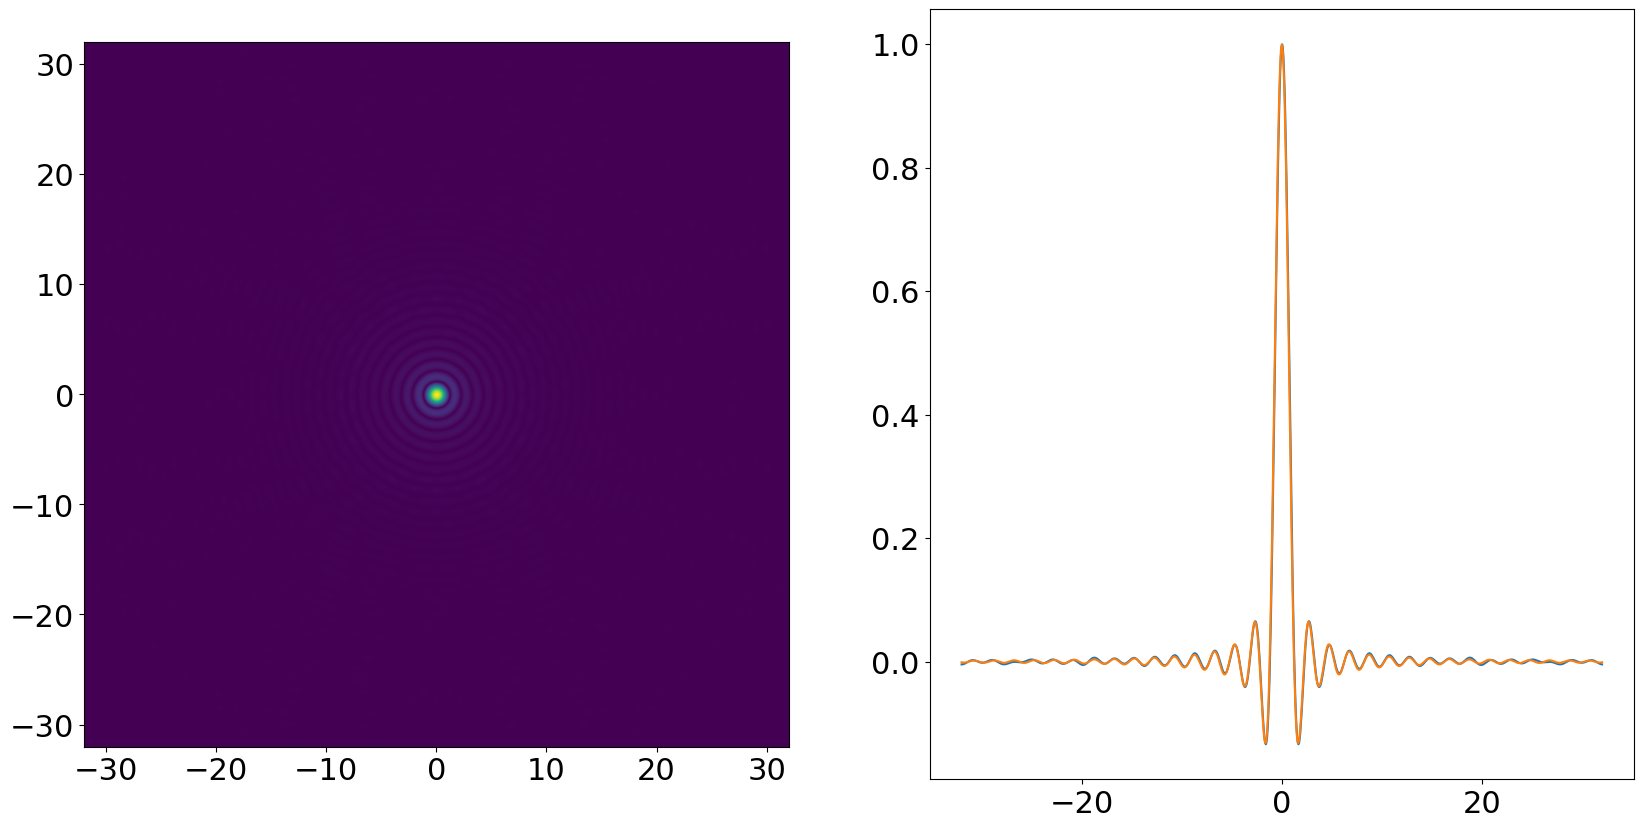

In [ ]:
#  spatial units are lambda f/#, spatial frequency in units of 1/lambda f/#, defocus in lambda
plt.figure(figsize=(20,10))
X=32
N=1024
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N/2),np.int16(N/2))/(N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
H = pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
hpeak=np.max(np.abs(h))
plt.subplot(1,2,1)
plt.imshow(np.abs(h),extent=[-X,X,-X,X])
plt.subplot(1,2,2)
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,side,jinc(side))


### PSF as a function of defocus

2 waves.

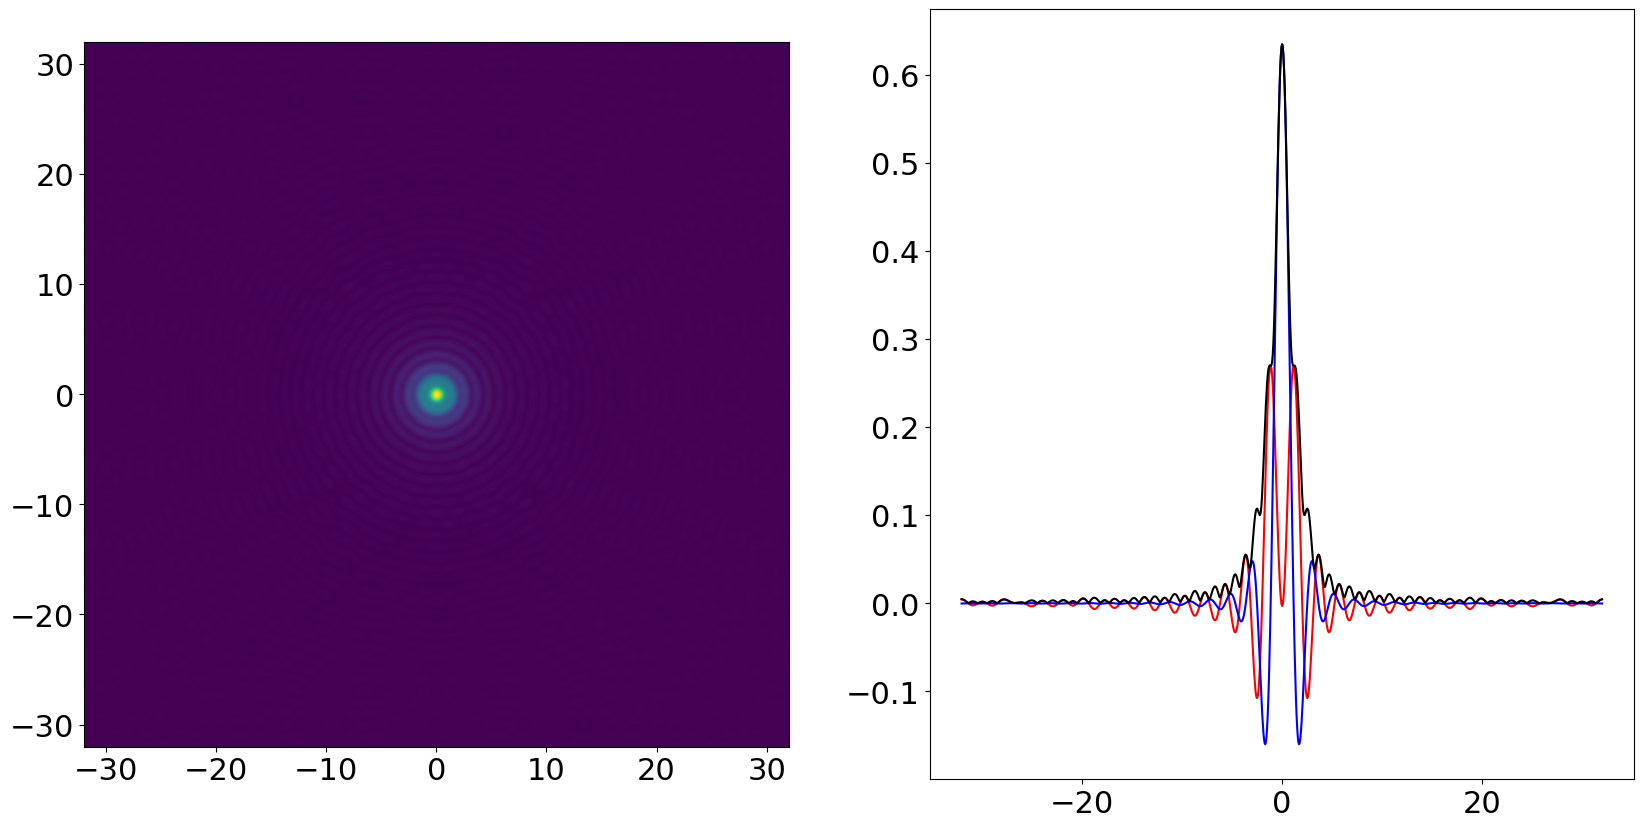

In [ ]:
#  spatial units are lambda f/#, spatial frequency in units of 1/lambda f/#, defocus is in wavelengths.
plt.figure(figsize=(20,10))
X=32
N=1024
w20=2
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N/2),np.int16(N/2))/(N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.subplot(1,2,1)
plt.imshow(np.abs(h),extent=[-X,X,-X,X])
plt.subplot(1,2,2)
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')

### various amounts of defocus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

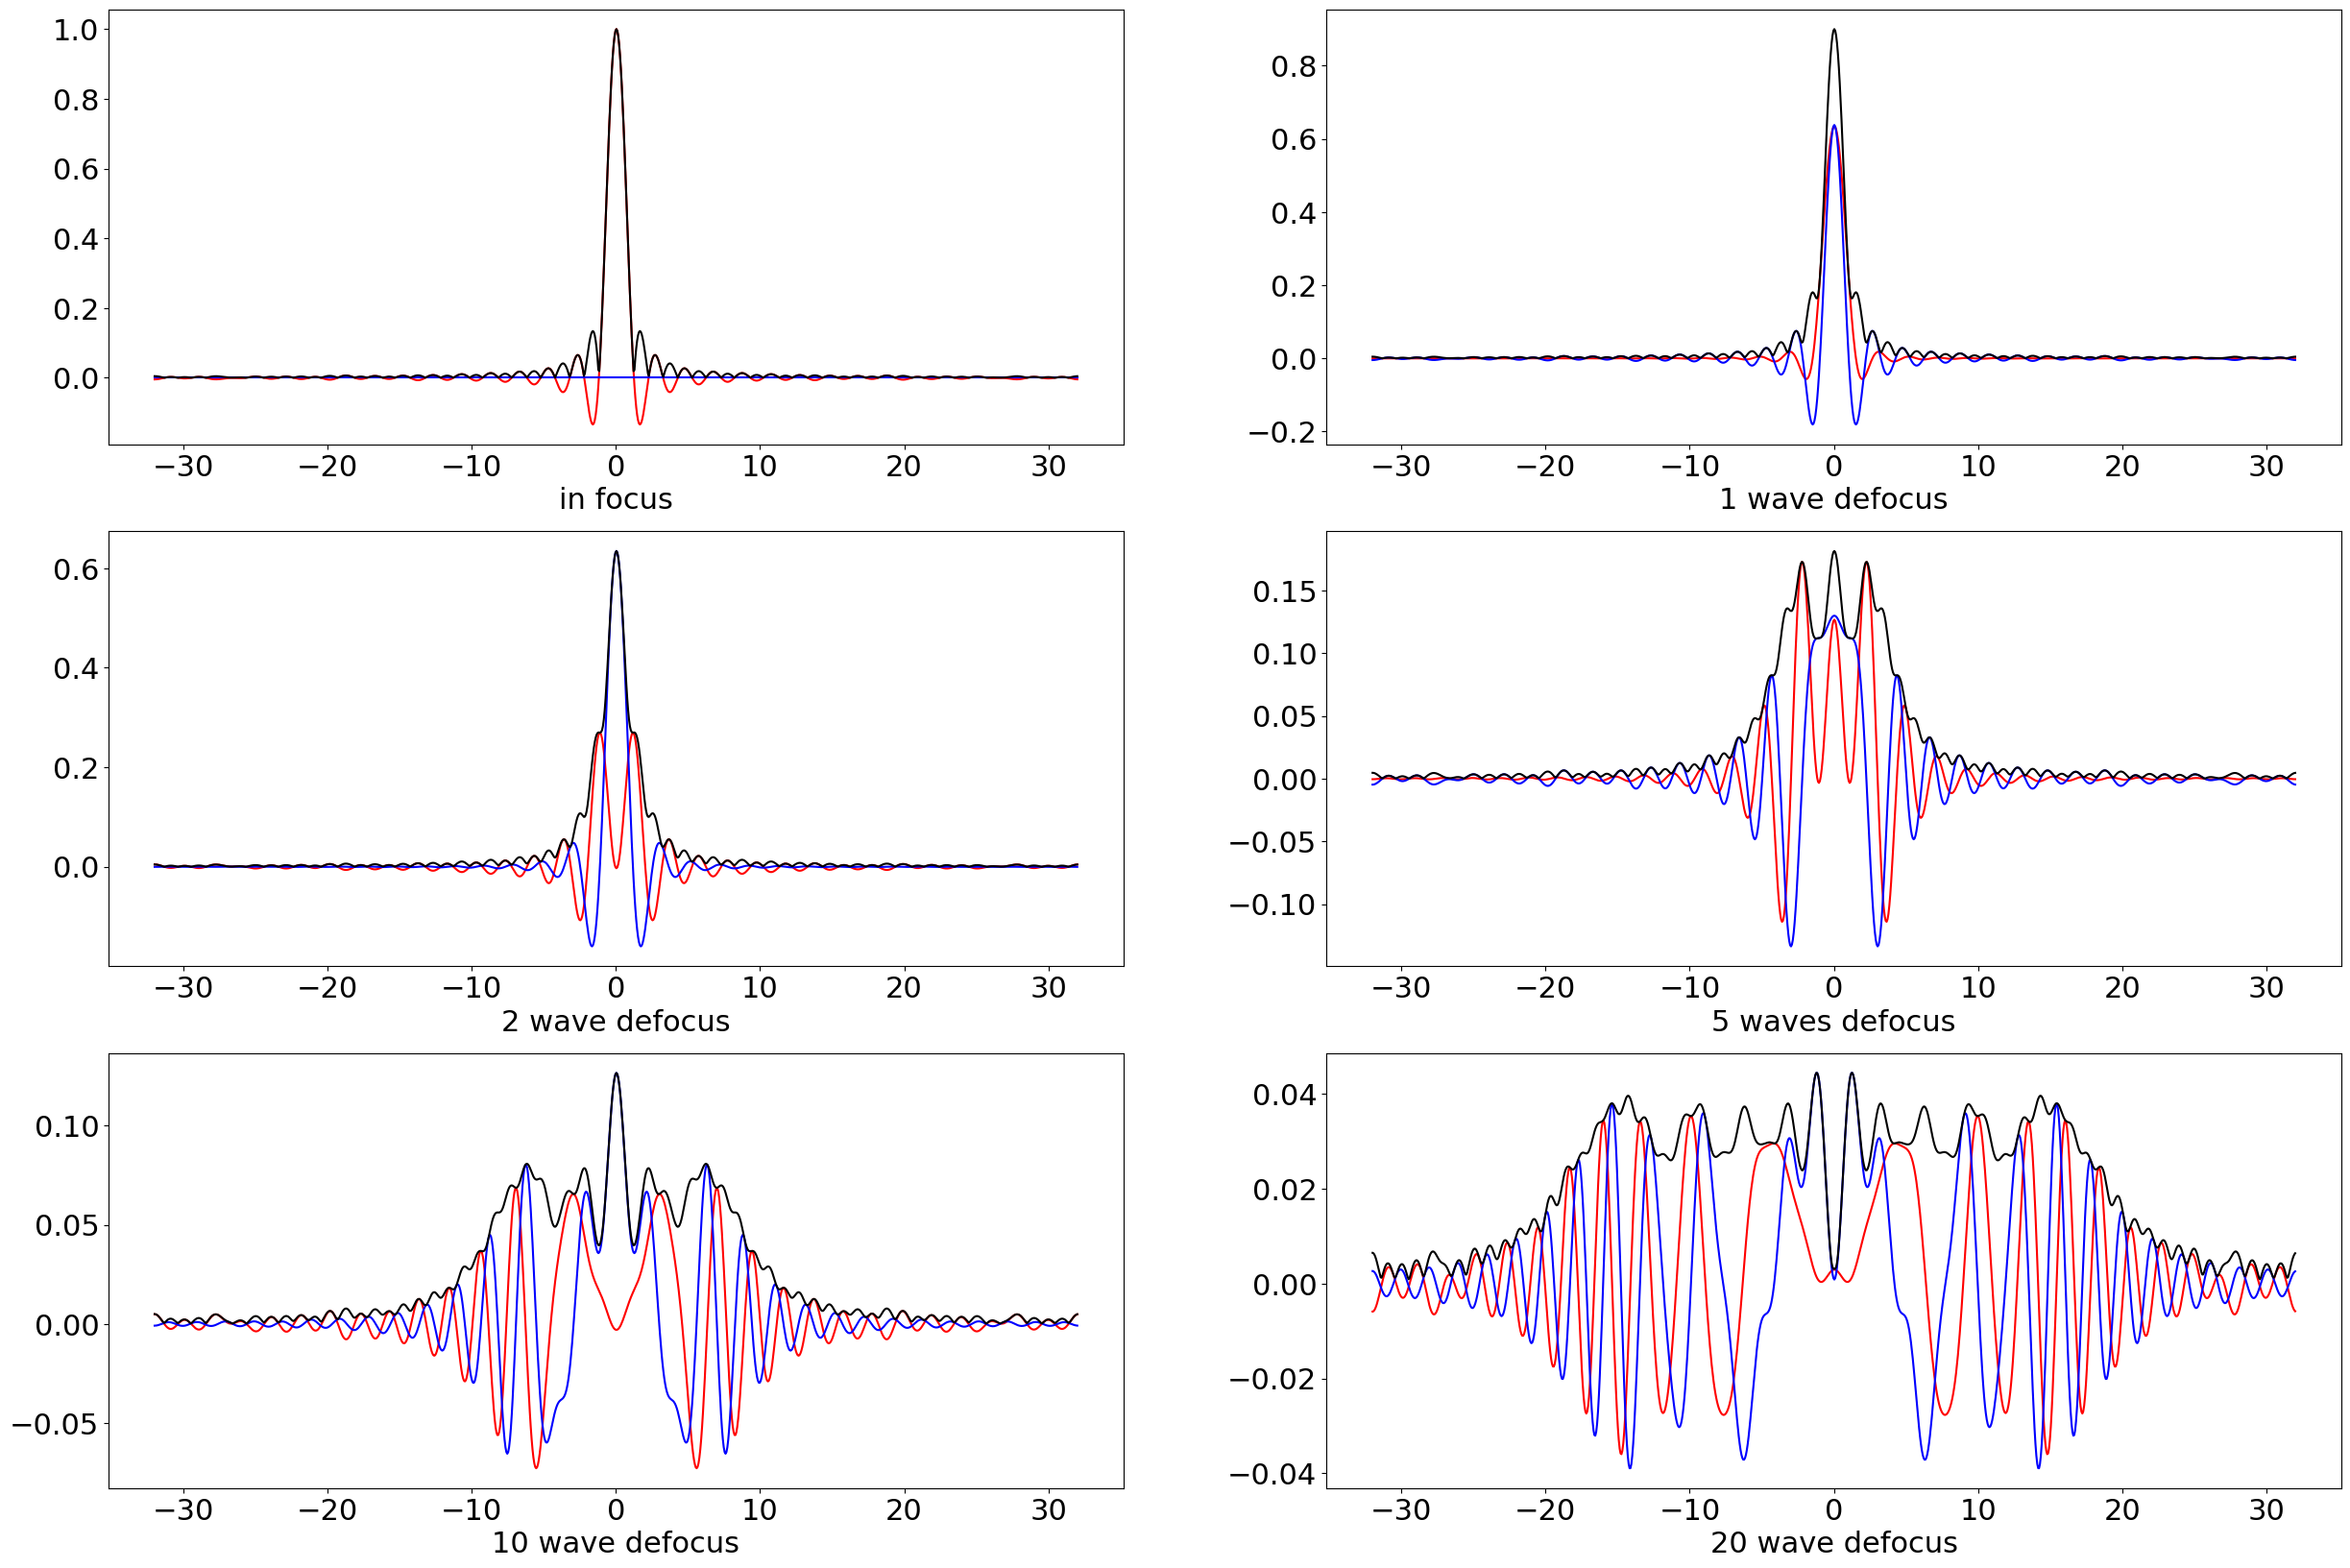

In [ ]:
# all spatial units are lambda f/#, spatial frequency in units of 1/lambda f/#
plt.figure(figsize=(30,20))
X=32
N=1024
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N/2),np.int16(N/2))/(N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
plt.subplot(3,2,1)
w20=0
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('in focus')
plt.subplot(3,2,2)
w20=1
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('1 wave defocus')
plt.subplot(3,2,3)
w20=2
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('2 wave defocus')
plt.subplot(3,2,4)
w20=5
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('5 waves defocus')
plt.subplot(3,2,5)
w20=10
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('10 wave defocus')
plt.subplot(3,2,6)
w20=20
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H)))
plt.plot(side,np.real(h[:,np.int16(N/2)])/hpeak,'r',side,np.imag(h[:,np.int16(N/2)])/hpeak,'b',side,np.abs(h[:,np.int16(N/2)])/hpeak,'k')
plt.xlabel('20 wave defocus')
plt.savefig('coherentDefocusPSF.pdf')
files.download('coherentDefocusPSF.pdf')

## Image transformations

here we assume that the object ranges from -64 $\lambda$ f/# to 64 $\lambda$ f/# and the sampling period is $\frac{\lambda f/\#}{4}$. Writing the signal as
$$f(x)=\cos (2\pi \alpha x^2)$$
we set we set $\alpha= \frac{1}{128(\lambda f/\#)^2}$, which means that at the edge of the field, the spatial frequency is approximately $\frac{0.5}{\lambda f/\#}$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

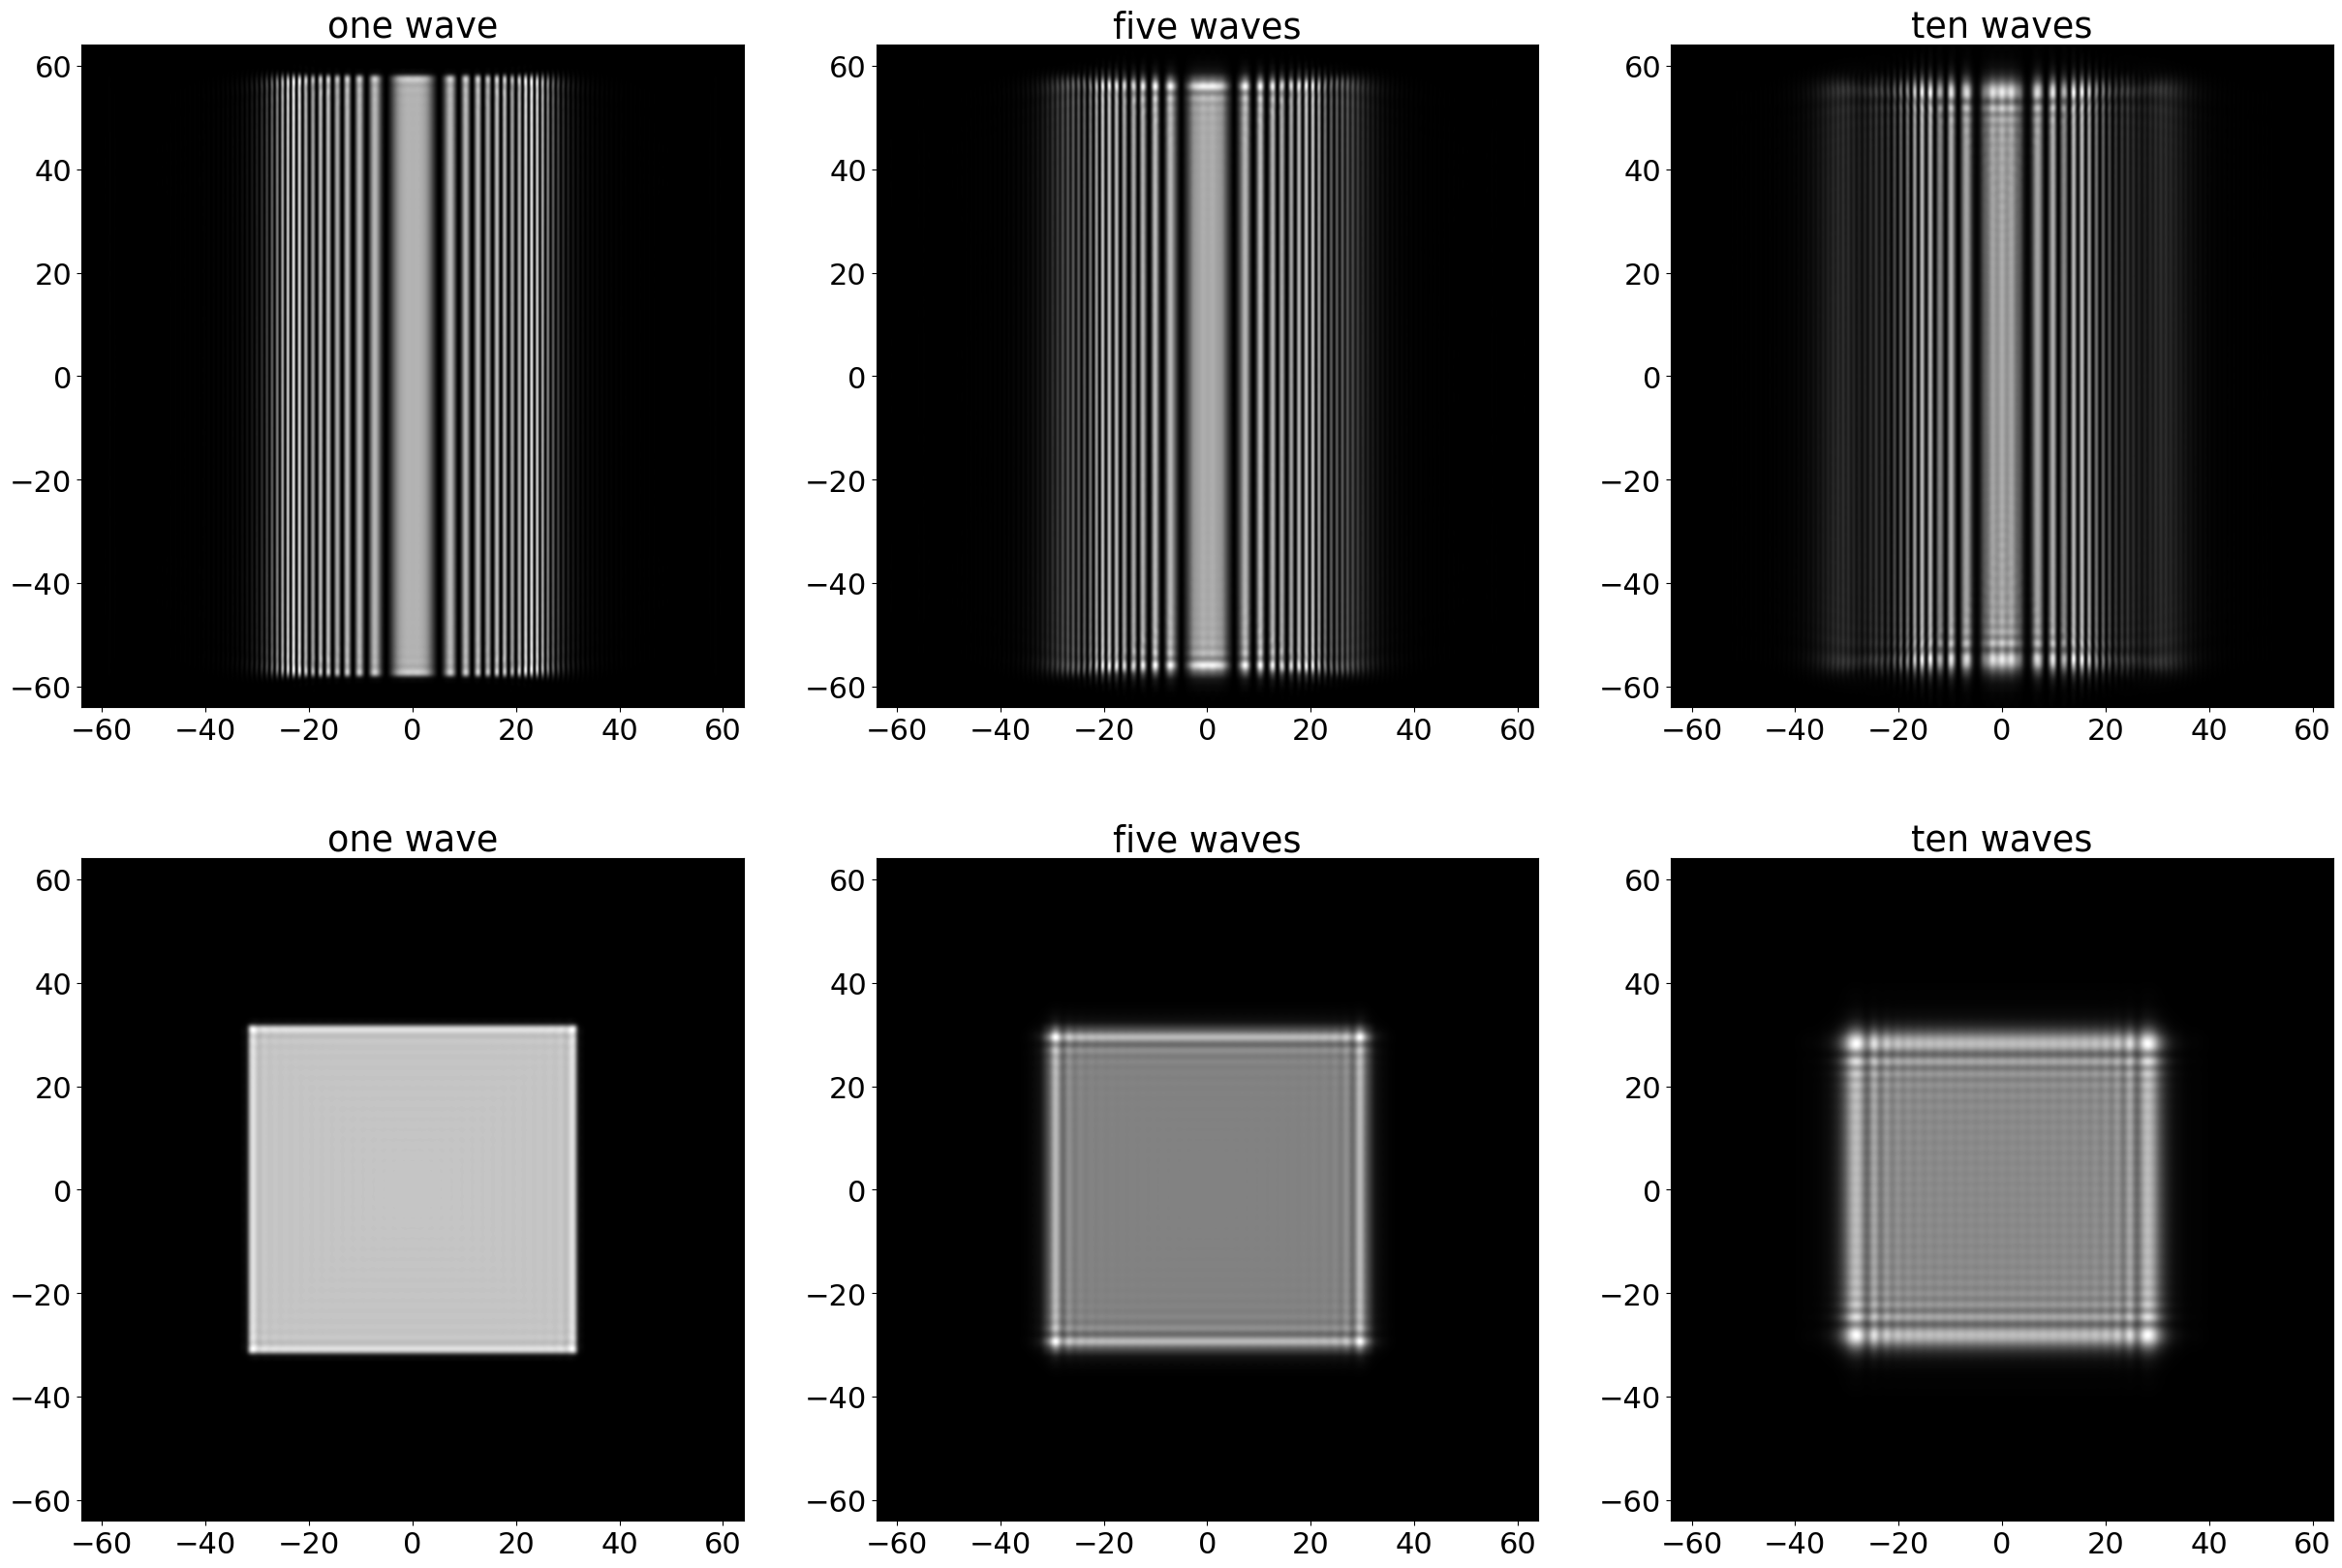

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
X=64
N=1024
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N),np.int16(N))/(2*N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
alpha=1./128.
Z = np.cos(2*np.pi*alpha*x**2)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
# one wave defocus
w20=1
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax1.set_title('one wave')
# 2 wave defocus
w20=5
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax2.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax2.set_title('five waves')
# 10 wave defocus
w20=10
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax3.set_title('ten waves')
# different object
Z=np.zeros((N,N))
Z[np.int16(N/4):np.int16(3*N/4),np.int16(N/4):np.int16(3*N/4)]=1
# one wave defocus
w20=1
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax4.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax4.set_title('one wave')
# 2 wave defocus
w20=5
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax5.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax5.set_title('five waves')
# 10 wave defocus
w20=10
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax6.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax6.set_title('ten waves')
plt.savefig('defocusChirp.pdf')
files.download('defocusChirp.pdf')


### Diffuse object

In [3]:

!wget --no-check-certificate --content-disposition 'https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/dubaiBridge.jpg'


--2023-07-11 20:45:45--  https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/dubaiBridge.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/dubaiBridge.jpg [following]
--2023-07-11 20:45:45--  https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/dubaiBridge.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2542532 (2.4M) [image/jpeg]
Saving to: ‘dubaiBridge.jpg’

dubaiBridge.jpg     100%[===================>]   2.42M  --.-KB/s    in 0.07s   


In [4]:
pop=io.imread('dubaiBridge.jpg',as_gray=True)
pop=pop[:,0:1868]
pop=cv2.resize(pop,(512,512))
pop=pop-np.mean(pop)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

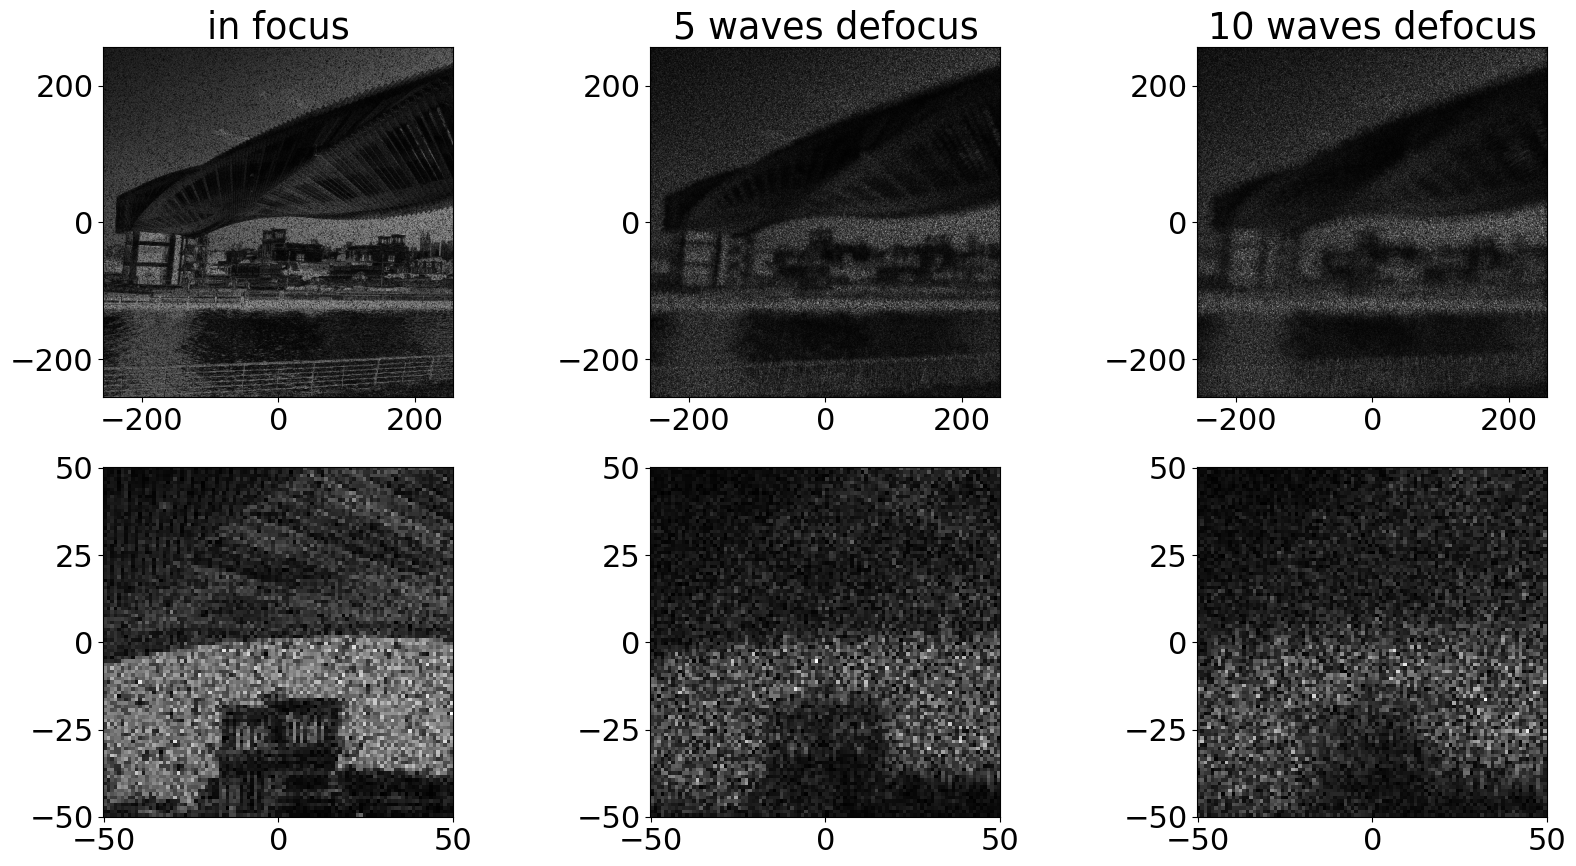

In [19]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
plt.rcParams['figure.figsize'] = [20, 10]
X=256
N=512
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N),np.int16(N))/(2*N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
Z = pop*np.exp(2*1j*np.pi*np.random.random(size=(N,N)))
# in focus wave
w20=0
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='gray', extent=[-X,X,-X,X], aspect='equal')
ax4.imshow(zzFiltered[200:300,200:300], cmap='gray', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax1.set_title('in focus')
# 5 waves
w20=5
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax2.imshow(zzFiltered, cmap='gray', extent=[-X,X,-X,X], aspect='equal')
ax5.imshow(zzFiltered[200:300,200:300], cmap='gray', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax2.set_title('5 waves defocus')
# ten waves
w20=10
zzftFiltered=zzft*pupil(np.sqrt(U**2+V**2))*np.exp(2*np.pi*1j*w20*(U**2+V**2))
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='gray', extent=[-X,X,-X,X], aspect='equal')
ax6.imshow(zzFiltered[200:300,200:300], cmap='gray', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax3.set_title('10 waves defocus')
plt.savefig('defocusSpeckle.pdf')
files.download('defocusSpeckle.pdf')

In [16]:
zzFiltered.shape

(512, 512)